In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [114]:

df = pd.read_csv('laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [116]:
print('Duplicated sum values:', df.duplicated().sum(), '\n')
print('Missing sum values:')
print(df.isnull().sum())

Duplicated sum values: 0 

Missing sum values:
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [117]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [118]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


Removing term 'kg' and 'GB from Weight and RAM column items respectively

In [119]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

In [120]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [121]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [122]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
dtype: object

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Price', ylabel='Density'>

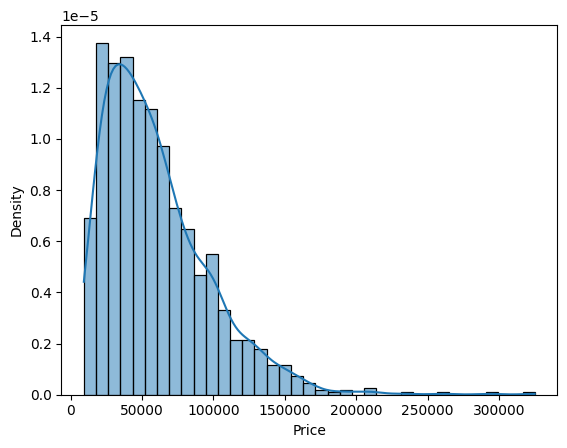

In [124]:
sns.histplot(df['Price'], kde=True, stat='density')

<Axes: xlabel='Company'>

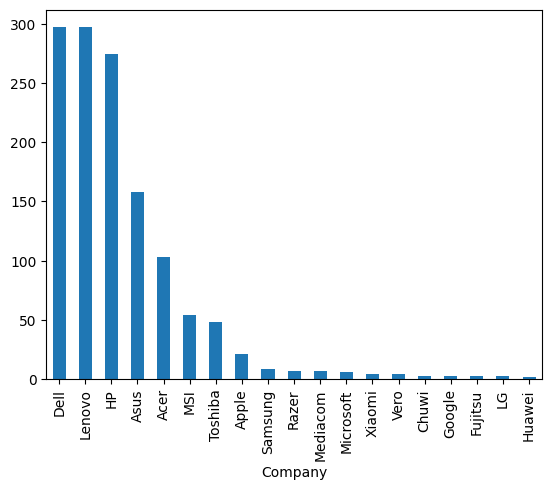

In [125]:
df['Company'].value_counts().plot(kind='bar')

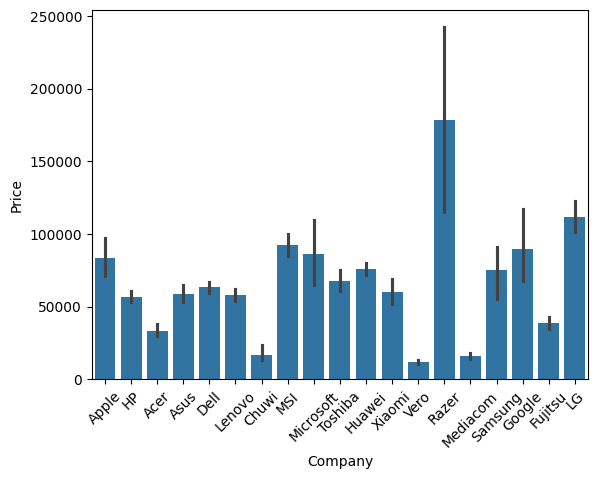

In [126]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='TypeName'>

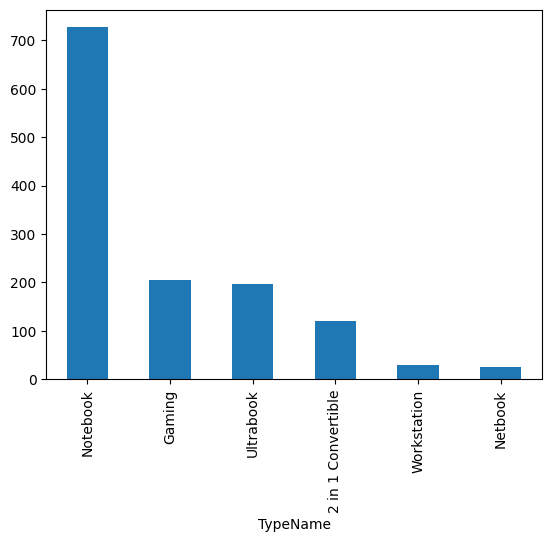

In [127]:

df['TypeName'].value_counts().plot(kind='bar')

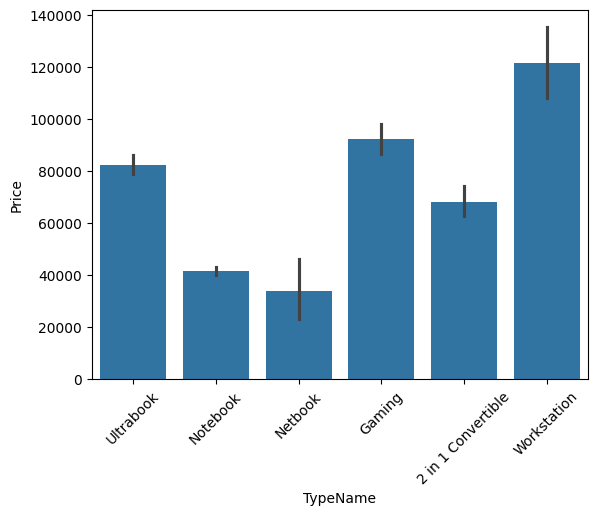

In [128]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Inches', ylabel='Density'>

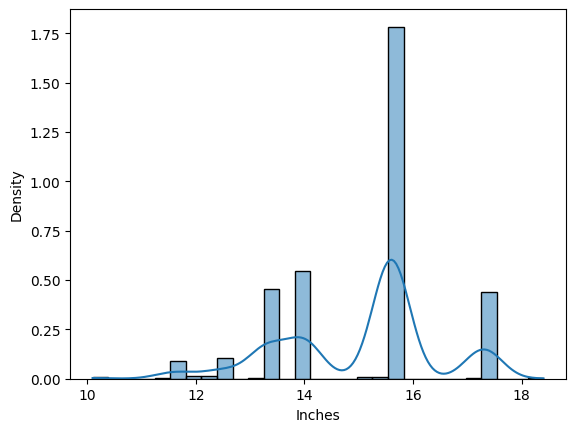

In [129]:
sns.histplot(df['Inches'], kde=True, stat='density')

<Axes: xlabel='Inches', ylabel='Price'>

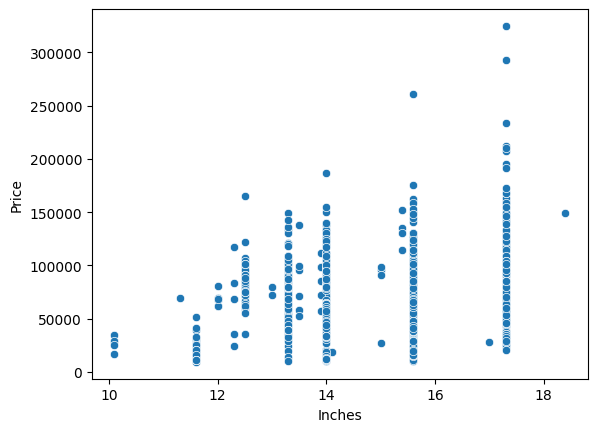

In [130]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

In [131]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

#### Terms to focus on: Touchscreen

In [132]:
df['Touchscreen'] = df['ScreenResolution'].apply(
    lambda x: 1 if 'Touchscreen' in x else 0)

In [133]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
845,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,256GB SSD,AMD Radeon R5 M420,Windows 10,2.18,39373.920,0
762,Google,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i5 7Y57 1.2GHz,8,256GB SSD,Intel HD Graphics 615,Chrome OS,1.10,83063.520,1
690,Acer,Notebook,14.0,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45,19980.000,0
471,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,500GB HDD,AMD FirePro W4190M,Windows 10,1.90,61485.120,0
680,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.20,53168.112,0


<Axes: xlabel='Touchscreen'>

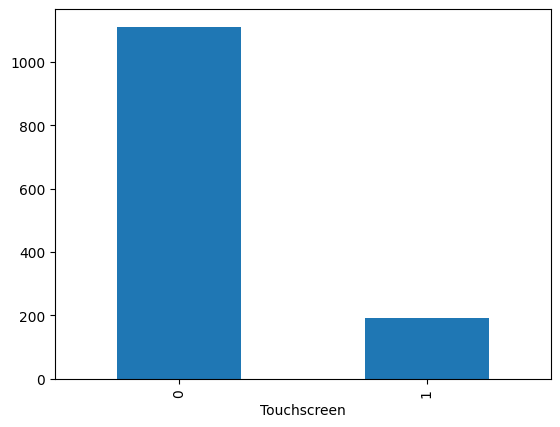

In [134]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

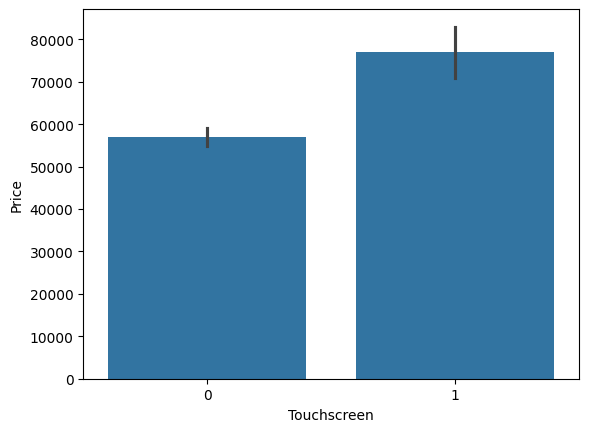

In [135]:
sns.barplot(x=df['Touchscreen'], y=df['Price'])

In [136]:
df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [137]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
1130,HP,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,2TB HDD,Intel HD Graphics 620,Windows 10,2.04,33513.12,0,0
344,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,84129.12,0,0
159,Toshiba,Notebook,15.6,1366x768,Intel Core i3 6006U 2.2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,23816.16,0,0


<Axes: xlabel='Ips', ylabel='Price'>

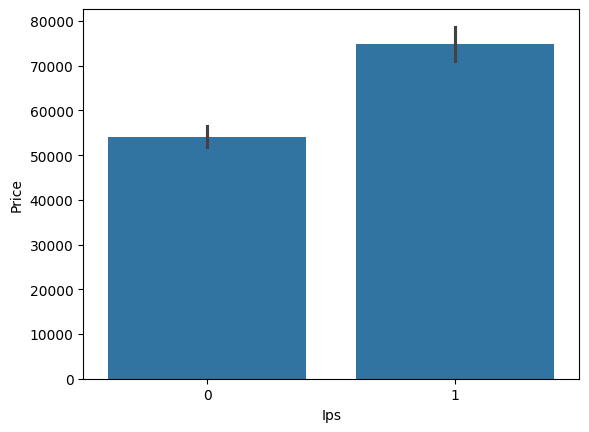

In [138]:
sns.barplot(x=df['Ips'], y=df['Price'])

In [139]:
SplitResolution = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [140]:
df['X_res'] = SplitResolution[0]
df['Y_res'] = SplitResolution[1]

In [141]:
df.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
1031,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,6,1TB HDD,AMD Radeon R5,Windows 10,2.10,21791.52,0,0,1366,768
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0,0,1366,768
619,Acer,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,20193.12,1,1,IPS Panel Touchscreen 1366,768
164,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.10,18541.44,0,0,1366,768


In [142]:
df['X_res'] = df['X_res'].str.replace(',', '').str.findall(
    r'(\d+\.?\d+)').apply(lambda x: x[0])

In [143]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080


In [144]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
Touchscreen           int64
Ips                   int64
X_res                object
Y_res                object
dtype: object

In [145]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [146]:
df['Price'].dtypes

dtype('float64')

In [147]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [148]:
# Calculating PPI(Pixel Per Inch) after seeing strong coorelations among X-res and Y-res
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))
             ** 0.5/df['Inches']).astype(float)

In [149]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [150]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [151]:
df.drop(columns=['Inches', 'X_res', 'Y_res'], inplace=True)

In [152]:
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998


In [153]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

#### Making Cpu Categories
- Intel Core i3
- Intel Core i5 
- Intel Core i7 
- AMD Chips
- Others (Intel Celeron, Pentium, Atom, Xeon, etc)

In [154]:
 df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [155]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
1124,Asus,Notebook,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.0,23176.8000,0,0,100.454670,Intel Core i3
502,Lenovo,2 in 1 Convertible,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.4,85194.7200,1,1,158.482530,Intel Core i5
1074,Lenovo,Ultrabook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.3,91294.7472,1,1,176.232574,Intel Core i7


In [156]:
def fetch_processor(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [157]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [158]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand
219,Dell,2 in 1 Convertible,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.62,68145.1200,1,0,165.632118,Intel Core i7,Intel Core i7
714,Dell,Notebook,Intel Core i5 7300U 2.6GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.93,76012.4448,0,0,141.211998,Intel Core i5,Intel Core i5
1004,Toshiba,Notebook,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.20,63669.6000,0,0,165.632118,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu Brand'>

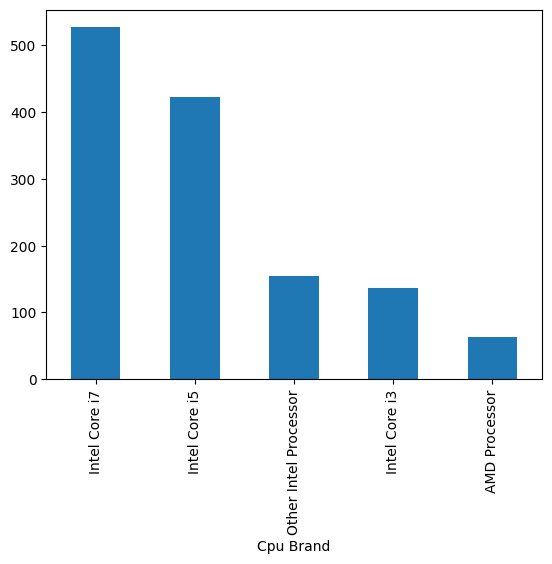

In [159]:
df['Cpu Brand'].value_counts().plot(kind='bar')

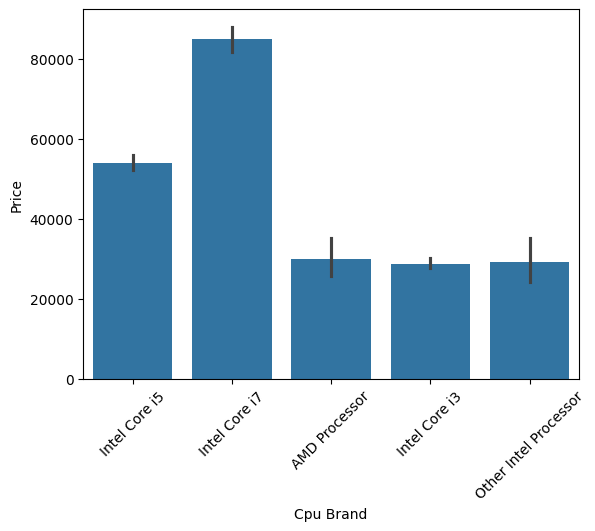

In [160]:
sns.barplot(x=df['Cpu Brand'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [161]:
df.drop(columns=['Cpu', 'Cpu Name'], inplace=True)

In [162]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

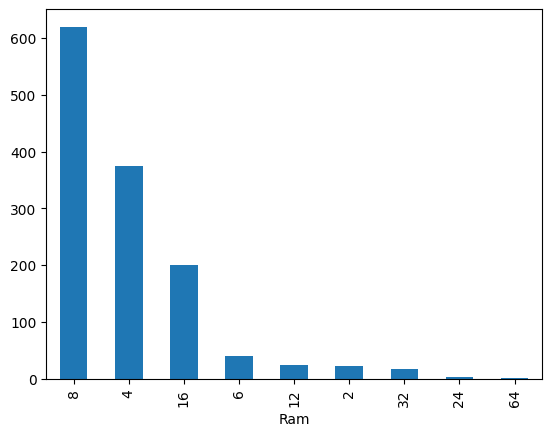

In [163]:
df['Ram'].value_counts().plot(kind='bar')

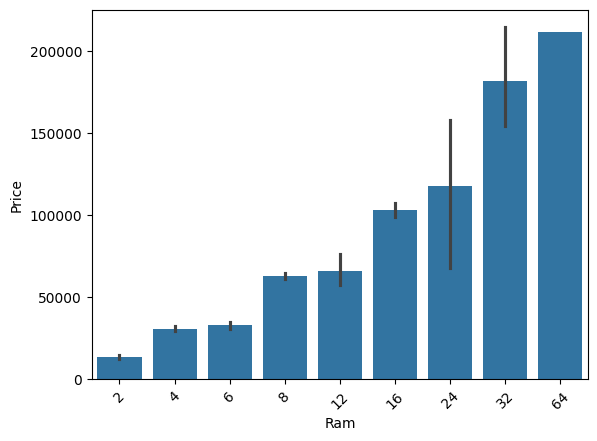

In [164]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [165]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [166]:
# Convert 'Memory' column to string and clean it
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Split 'Memory' into two parts based on '+'
new = df["Memory"].str.split("+", n=1, expand=True)

# Extract the first part and remove any leading/trailing whitespace
df["first"] = new[0]
df["first"] = df["first"].str.strip()

# Check if 'HDD', 'SSD', 'Hybrid', and 'Flash Storage' exist in 'first' and create binary columns
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in str(x) else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in str(x) else 0)
df["Layer1Hybrid"] = df["first"].apply(
    lambda x: 1 if "Hybrid" in str(x) else 0)
df["Layer1Flash_Storage"] = df["first"].apply(
    lambda x: 1 if "Flash Storage" in str(x) else 0)

# Extract the numeric part from 'first' and convert it to float
df['first'] = df['first'].str.extract('(\d+)').astype(float)

# Extract the second part from the split and fill any NaN values with '0'
df["second"] = new[1]
df["second"].fillna("0", inplace=True)

# Check if 'HDD', 'SSD', 'Hybrid', and 'Flash Storage' exist in 'second' and create binary columns
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in str(x) else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in str(x) else 0)
df["Layer2Hybrid"] = df["second"].apply(
    lambda x: 1 if "Hybrid" in str(x) else 0)
df["Layer2Flash_Storage"] = df["second"].apply(
    lambda x: 1 if "Flash Storage" in str(x) else 0)

# Extract the numeric part from 'second' and convert it to float
df['second'] = df['second'].str.extract('(\d+)').astype(float)

# Calculate HDD, SSD, Hybrid, and Flash_Storage based on binary values and numeric parts
df["HDD"] = (df["first"] * df["Layer1HDD"] +
             df["second"] * df["Layer2HDD"]).astype(int)
df["SSD"] = (df["first"] * df["Layer1SSD"] +
             df["second"] * df["Layer2SSD"]).astype(int)
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] +
                df["second"] * df["Layer2Hybrid"]).astype(int)
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] +
                       df["second"] * df["Layer2Flash_Storage"]).astype(int)

# Drop the intermediate and binary columns
df.drop(columns=['first', 'second',
                 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
                 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:37: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:37: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bdip6\AppData\Local\Temp\ipykernel_19056\33891521.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\bdip6\AppData\Local\Temp\ipykernel_19056\33891521.py:22: SyntaxWarning: invalid escape sequence '\d'
  df['first'] = df['first'].str.extract('(\d+)').astype(float)
C:\Users\bdip6\AppData\Local\Temp\ipykernel_19056\33891521.py:37: SyntaxWarning: invalid escape sequence '\d'
  df['second'] = df['second'].str.extract('(\d+)').astype(float)
C:\Users\bdip6\AppData\Local\Temp\ipykernel_19056\33891521.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assign

In [167]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
390,Asus,Gaming,8,1000 HDD,Nvidia GeForce GTX 1050,Windows 10,3.00,55357.92,0,0,127.335675,Intel Core i7,1000,0,0,0
23,Dell,2 in 1 Convertible,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.62,43636.32,1,0,165.632118,Intel Core i5,0,256,0,0
1290,Dell,Notebook,6,1000 HDD,Intel HD Graphics 620,Windows 10,2.30,24455.52,0,0,100.454670,Intel Core i3,1000,0,0,0
472,Google,Ultrabook,8,128 SSD,Intel HD Graphics 615,Chrome OS,1.10,67932.00,1,0,234.507400,Intel Core i5,0,128,0,0
180,Dell,Notebook,16,256 SSD + 2000 HDD,AMD Radeon 530,Linux,2.02,55890.72,0,0,141.211998,Intel Core i7,2000,256,0,0


In [168]:
df.drop(columns=['Memory'], inplace=True)

In [169]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [170]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [171]:
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)

In [172]:
df.sample(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD
331,Toshiba,Notebook,8,Intel HD Graphics 620,Windows 10,2.00,50243.0400,0,1,141.211998,Intel Core i5,0,256
992,Lenovo,Notebook,4,Intel HD Graphics 500,No OS,1.90,14418.6336,0,0,100.454670,Other Intel Processor,0,128
315,Dell,Notebook,8,AMD Radeon 530,Windows 10,2.33,44968.3200,0,0,141.211998,Intel Core i5,1000,128


In [173]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [174]:
df['GpuBrand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [175]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand
873,Lenovo,Notebook,4,Intel HD Graphics 620,Windows 10,1.44,39160.80,0,1,165.632118,Intel Core i3,0,180,Intel
1193,Apple,Ultrabook,8,Intel HD Graphics 5300,Mac OS X,0.92,61964.64,0,1,226.415547,Other Intel Processor,0,0,Intel
649,Lenovo,Ultrabook,8,Intel HD Graphics 620,Windows 10,1.36,84395.52,0,1,176.232574,Intel Core i7,0,256,Intel
79,HP,Notebook,8,Nvidia GeForce 930MX,Windows 10,2.50,52054.56,0,0,127.335675,Intel Core i5,1000,128,Nvidia
523,HP,Notebook,4,Intel HD Graphics 520,Windows 10,1.63,36709.92,0,0,100.454670,Intel Core i3,0,128,Intel


In [176]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [177]:
df = df[df['GpuBrand'] != 'ARM']

In [178]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

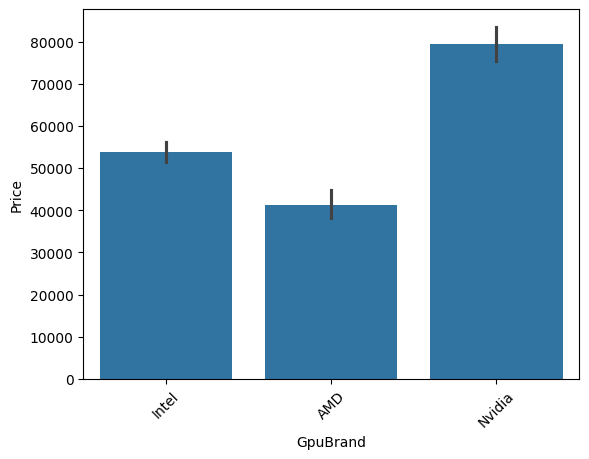

In [179]:
sns.barplot(x=df['GpuBrand'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [180]:
df.drop(columns=['Gpu'], inplace=True)

C:\Users\bdip6\AppData\Local\Temp\ipykernel_19056\3949037655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'], inplace=True)


In [181]:
df.sample(4)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand
154,HP,Ultrabook,4,Windows 10,1.48,57648.96,0,0,157.350512,Intel Core i5,0,256,Intel
1292,Dell,Notebook,2,Windows 10,2.20,20193.12,0,0,100.454670,Other Intel Processor,500,0,Intel
1157,Lenovo,Ultrabook,12,Windows 7,1.40,122490.72,0,0,157.350512,Intel Core i7,0,512,Intel
432,Lenovo,Notebook,4,Windows 10,1.70,31914.72,0,1,157.350512,Intel Core i3,0,128,Intel


In [182]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

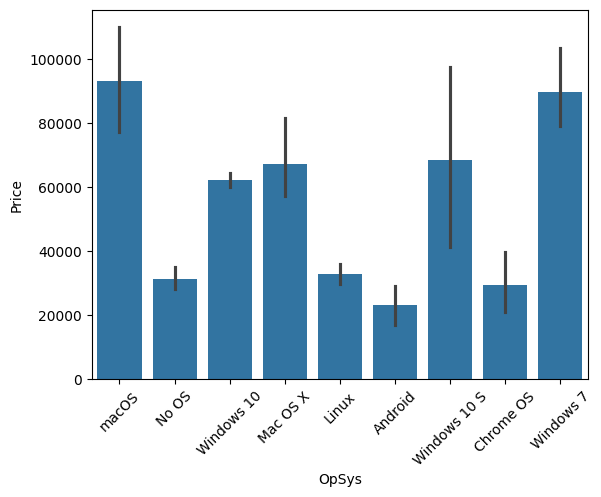

In [183]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [184]:
def categorizeOS(op):
    if op == 'Windows 10' or op == 'Windows 7' or op == 'Windows 10 S':
        return 'Windows'
    elif op == 'macOS' or op == 'Mac OS X':
        return 'Mac'
    else:
        return 'Linux/ChromeOS/Others'

In [185]:
df['os'] = df['OpSys'].apply(categorizeOS)

C:\Users\bdip6\AppData\Local\Temp\ipykernel_19056\2303965691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(categorizeOS)


In [186]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
37,Dell,Notebook,8,Windows 10,2.8,52161.1200,0,1,127.335675,Intel Core i5,1000,128,AMD,Windows
992,Lenovo,Notebook,4,No OS,1.9,14418.6336,0,0,100.454670,Other Intel Processor,0,128,Intel,Linux/ChromeOS/Others
262,HP,Notebook,4,Windows 10,2.1,38468.1600,0,1,141.211998,Intel Core i5,500,0,Intel,Windows
397,Lenovo,Notebook,8,Windows 10,1.9,49976.6400,0,1,157.350512,Intel Core i5,0,256,Intel,Windows
1277,Acer,Notebook,4,Linux,2.4,15397.9200,0,0,100.454670,Other Intel Processor,500,0,Intel,Linux/ChromeOS/Others


In [187]:
df.drop(columns=['OpSys'], inplace=True)

C:\Users\bdip6\AppData\Local\Temp\ipykernel_19056\2632010566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'], inplace=True)


In [188]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/ChromeOS/Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


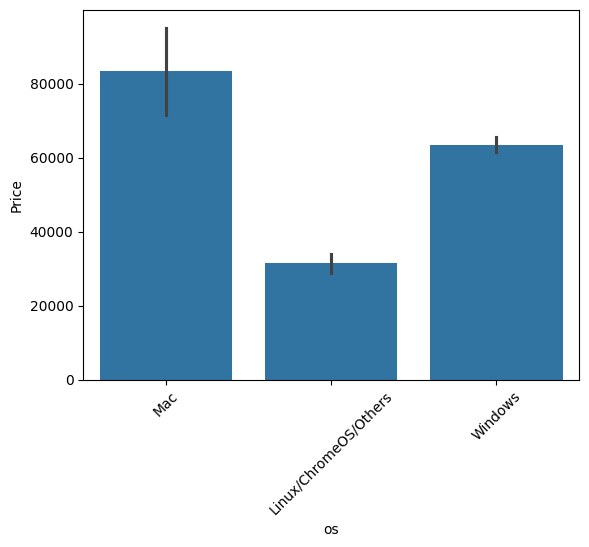

In [189]:
sns.barplot(x=df['os'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

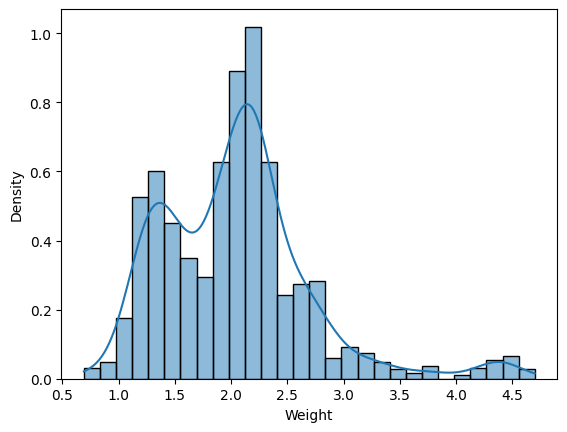

In [190]:
sns.histplot(df['Weight'], kde=True, stat='density')

<Axes: xlabel='Weight', ylabel='Price'>

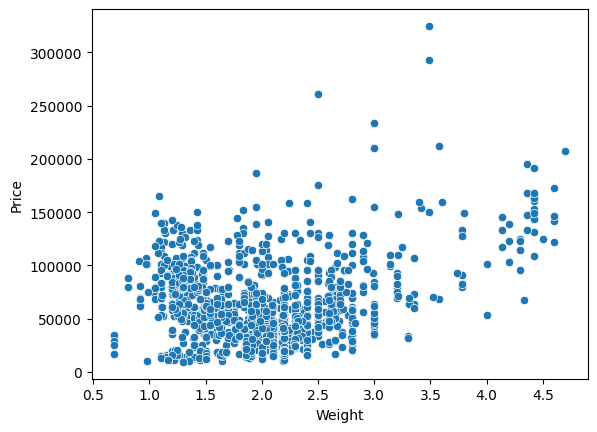

In [191]:
sns.scatterplot(x=df['Weight'], y=df['Price'])

In [192]:
df.corr(numeric_only=True)

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
Ips,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


<Axes: >

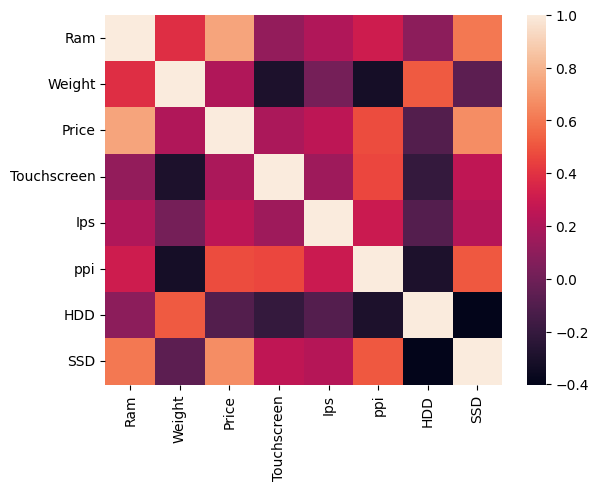

In [193]:
# Red means strongest correlation and white means extremely weak correlation
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='Price', ylabel='Density'>

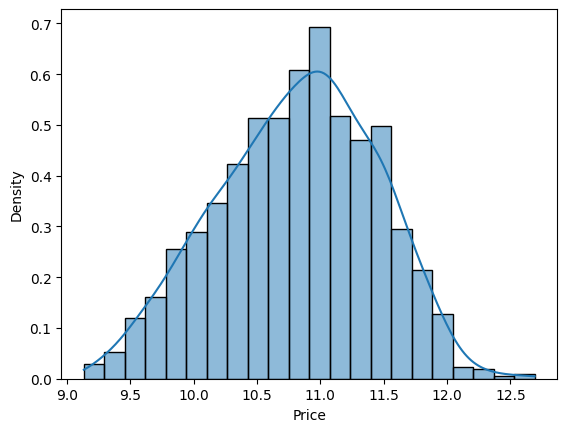

In [194]:
sns.histplot(np.log(df['Price']), kde=True, stat='density')

In [195]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [196]:
x.sample(5)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
317,Lenovo,Notebook,4,1.45,0,0,117.826530,Other Intel Processor,0,0,Intel,Linux/ChromeOS/Others
423,Asus,Notebook,8,2.30,0,0,141.211998,Intel Core i3,1000,0,Nvidia,Linux/ChromeOS/Others
373,Lenovo,Notebook,4,2.60,0,0,106.113062,AMD Processor,0,128,AMD,Windows
1210,Apple,Ultrabook,8,0.92,0,1,226.415547,Other Intel Processor,0,0,Intel,Mac
1242,Acer,Notebook,4,2.40,0,0,100.454670,Intel Core i3,500,0,Intel,Linux/ChromeOS/Others


In [197]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, random_state=2)

In [199]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Linux/ChromeOS/Others
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Linux/ChromeOS/Others


In [200]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV


In [201]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [202]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/ChromeOS/Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


| Description       | Number | Description       | Number |
| ----------------- | ------ | ----------------- | ------ |
| Company           | 0      | ppi               | 6      |
| TypeName          | 1      | Cpu Brand         | 7      |
| Ram               | 2      | HDD               | 8      |
| Weight            | 3      | SSD               | 9      |
| Touchscreen       | 4      | Gpu Brand         | 10     |
| Ips               | 5      | os                | 11     |


In [203]:
# Define the transformers for specific columns
transformers = [
    ('col_tnf', OneHotEncoder(
        sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
]

In [204]:
# Create the ColumnTransformer with 'passthrough' for other columns
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a LinearRegression model
step2 = LinearRegression()

# Create a pipeline that applies the ColumnTransformer and then the LinearRegression model
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8073277448418663
Mean Absolute Error: 0.21017827976428632


In [205]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a Ridge regression model
step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8126380428568218
Mean Absolute Error: 0.2096038073700089


In [206]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a Lasso regression model
step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.807067147449281
Mean Absolute Error: 0.21137354814603151


In [207]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a KNN regression model
step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.7963620316652673
Mean Absolute Error: 0.19924285560264074


In [208]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a Decision Tree Regressor model
step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8390810303693732
Mean Absolute Error: 0.1837945717743204


In [209]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a SVM model
step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8072523491682381
Mean Absolute Error: 0.20249880424600672


In [210]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a Random Forest Regressor model
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8847383535528592
Mean Absolute Error: 0.16163135423776417


In [211]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a ExtraTrees Regressor model
step2 = ExtraTreesRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15,
                            bootstrap=True)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8826189087062304
Mean Absolute Error: 0.16425415402874108


In [212]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a AdaBoost Regressor model
step2 = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.7751592470200277
Mean Absolute Error: 0.23918809949903683


In [213]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a AdaBoost Regressor model
step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8827017114138321
Mean Absolute Error: 0.15821373138235695


In [214]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a XGB Regressor model
step2 = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8837310647120712
Mean Absolute Error: 0.1606665636298157


In [215]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Define individual regression models
rf = RandomForestRegressor(n_estimators=350, random_state=3,
                           max_samples=0.5, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5)
et = ExtraTreesRegressor(n_estimators=100, random_state=3,
                         max_samples=0.5, max_features=0.75, max_depth=10, bootstrap=True)

# Create a Voting Regressor model that combines the individual models
# Adjusting weights for individual models in the ensemble to control their influence on the final prediction.
step2 = VotingRegressor(
    [('rf', rf), ('gbdt', gbdt), ('xgb', xgb), ('et', et)], weights=[5, 1, 1, 1])

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8888020520796986
Mean Absolute Error: 0.1597516017267388


In [216]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Define individual regression models
rf = RandomForestRegressor(n_estimators=350, random_state=3,
                           max_samples=0.5, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5)

# Create a Stacking Regressor model that combines the individual models
step2 = StackingRegressor(
    [('rf', rf), ('gbdt', gbdt), ('xgb', xgb)], final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8821727406733154
Mean Absolute Error: 0.16380880476342152


In [217]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/ChromeOS/Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [218]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Linux/ChromeOS/Others
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Linux/ChromeOS/Others


In [219]:
import pickle

# Export the model
pickle.dump(df,open('laptop_data.pkl','wb'))
pickle.dump(pipe,open('pipe_object.pkl','wb'))

In [220]:
transformers = [
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
]

step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

# Parameter grid for hyperparameter tuning
param_grid = {
    'step2__n_estimators': [100, 200, 300],
    'step2__max_depth': [10, 15, 20],
    'step2__max_features': [0.6, 0.7, 0.8],
}

# GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predictions on the test data using the tuned model
y_pred = best_estimator.predict(X_test)

# Evaluate the tuned model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Best Parameters:', best_params)
print('R2 Score:', round(r2, 2), '(', round(r2 * 100, 2), '%)')
print('Mean Absolute Error:', round(mae, 2), '(', round(mae * 100, 2), '%)')

Best Parameters: {'step2__max_depth': 20, 'step2__max_features': 0.6, 'step2__n_estimators': 200}
R2 Score: 0.89 ( 89.21 %)
Mean Absolute Error: 0.15 ( 15.42 %)


In [221]:
from sklearn.model_selection import RandomizedSearchCV

transformers = [
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11]),
]

step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create an ensemble of models
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

# Create a VotingRegressor model
voting = VotingRegressor(
    estimators=[('rf', rf), ('gb', gb)],
    weights=[1, 1]
)

# Create a Pipeline that applies the ColumnTransformer and then the VotingRegressor model
pipe = Pipeline([
    ('step1', step1),
    ('scaler', StandardScaler()),
    ('voting', voting)
])

# Parameter grid for hyperparameter tuning
param_dist = {
    'voting__rf__n_estimators': [100, 200, 300],
    'voting__rf__max_depth': [10, 15, 20],
    'voting__rf__max_features': [0.6, 0.7, 0.8],
    'voting__gb__n_estimators': [100, 200, 300],
    'voting__gb__max_depth': [3, 4, 5],
}

random_search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', n_jobs=-1)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

y_pred = best_estimator.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Best Parameters:', best_params)
print('R2 Score:', round(r2, 2), '(', round(r2 * 100, 2), '%)')
print('Mean Absolute Error:', round(mae, 2), '(', round(mae * 100, 2), '%)')


Best Parameters: {'voting__rf__n_estimators': 300, 'voting__rf__max_features': 0.6, 'voting__rf__max_depth': 15, 'voting__gb__n_estimators': 300, 'voting__gb__max_depth': 3}
R2 Score: 0.89 ( 89.28 %)
Mean Absolute Error: 0.15 ( 15.38 %)


In [222]:
import pickle

pickle.dump(df,open('laptop_data.pkl','wb'))

# Export the tuned model
with open('pipe_object.pkl', 'wb') as model_file:
    pickle.dump(best_estimator, model_file)